In [105]:
import scanpy as sc
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
from scipy import sparse
import itertools as it
import anndata as ad
from utils import *

In [113]:
FILE = "datasets/10XGenomics/Targeted_SC3v3_Human_Glioblastoma_Neuroscience_filtered_feature_bc_matrix.h5"
FILE = "datasets/10XGenomics/Human_PBMCs_Next_GEM_Flex_GEM-X_Flex_Comparison_count_filtered_feature_bc_matrix.h5"

In [114]:
adata = sc.read_10x_h5(FILE)
X = adata.X.todense()

/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [115]:
cuts2 = {}
def get_optimal_cut(file, lo=3, hi=127):
    adata_uncut = sc.read_10x_h5(file)
    l1 = get_leiden(adata_uncut)
    best_score, best_cut = None, None
    for n in tqdm.trange(lo, hi + 1):
        adata_cut = ad.AnnData(reclassify(sc.read_10x_h5(file).X.todense(), n))
        l2 = get_leiden(adata_cut)
        score = compare_leidens(l1, l2)
        cuts2[n] = score
        if best_score is None or score > best_score:
            best_score = score
            best_cut = n
    print(f"Best cut: {best_cut} with score={best_score}")
    return best_cut

In [ ]:
get_optimal_cut(FILE)

/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  0%|                        

Best group for 0: 0, score=0.9856661045531198
Best group for 1: 1, score=0.9447852760736196
Best group for 2: 2, score=0.9511930585683297
Best group for 3: 6, score=0.7436208991494532
Best group for 4: 4, score=0.9912280701754386
Best group for 5: 3, score=0.7259036144578314
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9689320388349515
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8914165103189493


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.45it/s]
2it [00:00,  5.05it/s]
3it [00:00,  4.93it/s]
4it [00:00,  4.89it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  2%|███▉                                                                                                                                                                

Best group for 0: 0, score=0.9671163575042159
Best group for 1: 1, score=0.983640081799591
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9635479951397327
Best group for 4: 5, score=0.9839181286549707
Best group for 5: 4, score=0.6987951807228916
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9925093632958801
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9170966228893058


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.26it/s]
2it [00:00,  5.14it/s]
3it [00:00,  5.12it/s]
4it [00:00,  5.15it/s]
5it [00:00,  5.15it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  2%|█████▉                                                                                                                                       

Best group for 0: 0, score=0.8136593591905565
Best group for 1: 3, score=0.9805725971370143
Best group for 2: 2, score=0.9924078091106291
Best group for 3: 6, score=0.6962332928311057
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 1, score=0.9201807228915663
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9553398058252427
Best group for 9: 8, score=0.9785992217898832
Best group for 10: 11, score=0.5864022662889519
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 12, score=0.9791666666666666
Best group for 13: 13, score=0.9369369369369369
Best group for 14: 14, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9098264540337712


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.78it/s]
2it [00:00,  5.57it/s]
3it [00:00,  5.56it/s]
4it [00:00,  5.53it/s]
5it [00:00,  5.47it/s]
6it [00:01,  5.45it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  3%|███████▊                                                                                                              

Best group for 0: 0, score=0.9780775716694773
Best group for 1: 1, score=0.9846625766871165
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 6, score=0.7278250303766707
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.7695783132530121
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=0.9565217391304348
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9002110694183865


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.40it/s]
2it [00:00,  5.44it/s]
3it [00:00,  5.46it/s]
4it [00:00,  5.48it/s]
5it [00:00,  5.46it/s]
6it [00:01,  5.47it/s]
7it [00:01,  5.46it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  4%|█████████▊                                                                                     

Best group for 0: 0, score=0.9561551433389545
Best group for 1: 1, score=0.9826175869120655
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 4, score=0.9720534629404617
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 3, score=0.7650602409638554
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9212007504690432


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.23it/s]
2it [00:00,  4.34it/s]
3it [00:00,  4.97it/s]
4it [00:00,  5.21it/s]
5it [00:01,  5.34it/s]
6it [00:01,  5.46it/s]
7it [00:01,  5.50it/s]
8it [00:01,  5.12it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  5%|███████████▊                                                            

Best group for 0: 0, score=0.9932546374367622
Best group for 1: 1, score=0.9815950920245399
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 6, score=0.7181044957472661
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.6671686746987951
Best group for 6: 5, score=0.9968652037617555
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9864077669902913
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9583333333333334
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8946998123827392


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.05it/s]
2it [00:00,  6.60it/s]
3it [00:00,  6.75it/s]
4it [00:00,  6.82it/s]
5it [00:00,  6.86it/s]
6it [00:00,  6.89it/s]
7it [00:01,  6.87it/s]
8it [00:01,  6.91it/s]
9it [00:01,  6.83it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  6%|█████████████▊                                   

Best group for 0: 0, score=0.9873524451939292
Best group for 1: 1, score=0.9887525562372188
Best group for 2: 2, score=0.9891540130151844
Best group for 3: 6, score=0.6901579586877278
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.7123493975903614
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9813432835820896
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9887640449438202
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=0.9565217391304348
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8927063789868668


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.13it/s]
2it [00:00,  6.51it/s]
3it [00:00,  6.66it/s]
4it [00:00,  6.70it/s]
5it [00:00,  6.65it/s]
6it [00:00,  6.71it/s]
7it [00:01,  6.75it/s]
8it [00:01,  6.78it/s]
9it [00:01,  6.76it/s]
10it [00:01,  6.66it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  6%|███████████████▋         

Best group for 0: 0, score=0.9688026981450253
Best group for 1: 2, score=0.9754601226993865
Best group for 2: 1, score=0.9956616052060737
Best group for 3: 4, score=0.9550425273390036
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 3, score=0.7469879518072289
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9813432835820896
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9887640449438202
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9186210131332082


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.23it/s]
2it [00:00,  5.94it/s]
3it [00:00,  5.87it/s]
4it [00:00,  5.82it/s]
5it [00:00,  5.80it/s]
6it [00:01,  5.81it/s]
7it [00:01,  5.79it/s]
8it [00:01,  5.79it/s]
9it [00:01,  5.78it/s]
10it [00:01,  5.79it/s]
11it [00:01,  5.81it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
  7%|█

Best group for 0: 0, score=0.9258010118043845
Best group for 1: 2, score=0.9775051124744376
Best group for 2: 1, score=0.9891540130151844
Best group for 3: 3, score=0.9793438639125152
Best group for 4: 5, score=0.9839181286549707
Best group for 5: 4, score=0.7274096385542169
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9813432835820896
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9887640449438202
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.912640712945591


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.85it/s]
2it [00:00,  5.30it/s]
3it [00:00,  5.46it/s]
4it [00:00,  5.54it/s]
5it [00:00,  5.58it/s]
6it [00:01,  5.44it/s]
7it [00:01,  5.50it/s]
8it [00:01,  5.56it/s]
9it [00:01,  5.59it/s]
10it [00:01,  5.63it/s]
11it [00:01,  5.65it/s]
12it [00:02,  5.55it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view

Best group for 0: 0, score=0.9890387858347386
Best group for 1: 1, score=0.9918200408997955
Best group for 2: 2, score=0.9891540130151844
Best group for 3: 6, score=0.7424058323207776
Best group for 4: 4, score=0.97953216374269
Best group for 5: 3, score=0.6596385542168675
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9813432835820896
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8955206378986866


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.24it/s]
2it [00:00,  6.24it/s]
3it [00:00,  6.16it/s]
4it [00:00,  6.20it/s]
5it [00:00,  6.08it/s]
6it [00:00,  6.05it/s]
7it [00:01,  6.06it/s]
8it [00:01,  6.11it/s]
9it [00:01,  6.16it/s]
10it [00:01,  6.20it/s]
11it [00:01,  6.14it/s]
12it [00:01,  6.11it/s]
13it [00:02,  6.14it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnDat

Best group for 0: 0, score=0.9553119730185498
Best group for 1: 1, score=0.9867075664621677
Best group for 2: 2, score=0.9891540130151844
Best group for 3: 3, score=0.968408262454435
Best group for 4: 5, score=0.9839181286549707
Best group for 5: 4, score=0.7259036144578314
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9813432835820896
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9181519699812383


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.39it/s]
2it [00:00,  5.30it/s]
3it [00:00,  5.49it/s]
4it [00:00,  5.55it/s]
5it [00:00,  5.60it/s]
6it [00:01,  5.65it/s]
7it [00:01,  5.67it/s]
8it [00:01,  5.62it/s]
9it [00:01,  5.64it/s]
10it [00:01,  5.64it/s]
11it [00:01,  5.64it/s]
12it [00:02,  5.65it/s]
13it [00:02,  5.68it/s]
14it [00:02,  5.62it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Rece

Best group for 0: 0, score=0.9637436762225969
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 4, score=0.9611178614823815
Best group for 4: 5, score=0.9912280701754386
Best group for 5: 3, score=0.7379518072289156
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9669902912621359
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9101782363977486


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.09it/s]
2it [00:00,  5.88it/s]
3it [00:00,  5.92it/s]
4it [00:00,  5.70it/s]
5it [00:00,  5.71it/s]
6it [00:01,  5.74it/s]
7it [00:01,  5.77it/s]
8it [00:01,  5.82it/s]
9it [00:01,  5.82it/s]
10it [00:01,  5.83it/s]
11it [00:01,  5.84it/s]
12it [00:02,  5.82it/s]
13it [00:02,  5.83it/s]
14it [00:02,  5.84it/s]
15it [00:02,  5.82it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.p

Best group for 0: 0, score=0.8625632377740303
Best group for 1: 1, score=0.9867075664621677
Best group for 2: 2, score=0.9891540130151844
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.9839181286549707
Best group for 5: 4, score=0.9096385542168675
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9944029850746269
Best group for 8: 9, score=0.9844660194174757
Best group for 9: 8, score=0.9785992217898832
Best group for 10: 10, score=0.9546742209631728
Best group for 11: 11, score=0.9700374531835206
Best group for 12: 12, score=0.9791666666666666
Best group for 13: 13, score=0.9009009009009009
Best group for 14: 14, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9583724202626641


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.36it/s]
2it [00:00,  6.42it/s]
3it [00:00,  6.16it/s]
4it [00:00,  6.18it/s]
5it [00:00,  6.26it/s]
6it [00:00,  6.31it/s]
7it [00:01,  6.19it/s]
8it [00:01,  6.17it/s]
9it [00:01,  6.21it/s]
10it [00:01,  6.19it/s]
11it [00:01,  6.21it/s]
12it [00:01,  6.18it/s]
13it [00:02,  6.17it/s]
14it [00:02,  6.20it/s]
15it [00:02,  6.24it/s]
16it [00:02,  6.23it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/scanpy/prepro

Best group for 0: 0, score=0.9704890387858347
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9577006507592191
Best group for 3: 4, score=0.9611178614823815
Best group for 4: 6, score=0.9912280701754386
Best group for 5: 3, score=0.7590361445783133
Best group for 6: 7, score=0.9952978056426333
Best group for 7: 5, score=0.9981343283582089
Best group for 8: 9, score=0.9864077669902913
Best group for 9: 8, score=0.980544747081712
No match for 10
No match for 11
Best group for 12: 10, score=0.9791666666666666
Best group for 13: 11, score=0.9009009009009009
Best group for 14: 12, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8833255159474672


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.25it/s]
2it [00:00,  6.33it/s]
3it [00:00,  6.31it/s]
4it [00:00,  6.28it/s]
5it [00:00,  6.29it/s]
6it [00:00,  6.30it/s]
7it [00:01,  6.29it/s]
8it [00:01,  6.28it/s]
9it [00:01,  6.25it/s]
10it [00:01,  6.25it/s]
11it [00:01,  6.25it/s]
12it [00:01,  6.28it/s]
13it [00:02,  6.27it/s]
14it [00:02,  6.26it/s]
15it [00:02,  6.26it/s]
16it [00:02,  6.25it/s]
17it [00:02,  6.27it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/sit

Best group for 0: 0, score=0.9333895446880269
Best group for 1: 1, score=0.9775051124744376
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 3, score=0.9732685297691372
Best group for 4: 5, score=0.9883040935672515
Best group for 5: 4, score=0.7394578313253012
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9122889305816135


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.26it/s]
2it [00:00,  6.27it/s]
3it [00:00,  6.34it/s]
4it [00:00,  6.29it/s]
5it [00:00,  6.07it/s]
6it [00:00,  5.97it/s]
7it [00:01,  6.06it/s]
8it [00:01,  6.18it/s]
9it [00:01,  6.27it/s]
10it [00:01,  6.25it/s]
11it [00:01,  6.28it/s]
12it [00:01,  6.31it/s]
13it [00:02,  6.33it/s]
14it [00:02,  6.35it/s]
15it [00:02,  6.38it/s]
16it [00:02,  6.38it/s]
17it [00:02,  6.39it/s]
18it [00:02,  6.28it/s]
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES

Best group for 0: 0, score=0.9569983136593592
Best group for 1: 2, score=0.9754601226993865
Best group for 2: 1, score=0.9945770065075922
Best group for 3: 4, score=0.9526123936816525
Best group for 4: 6, score=0.9839181286549707
Best group for 5: 3, score=0.733433734939759
Best group for 6: 7, score=0.9952978056426333
Best group for 7: 5, score=0.9981343283582089
Best group for 8: 9, score=0.9864077669902913
Best group for 9: 8, score=0.980544747081712
No match for 10
No match for 11
Best group for 12: 10, score=0.9791666666666666
Best group for 13: 11, score=1.0
Best group for 14: 12, score=1.0
Best group for 15: 13, score=0.9354838709677419
Best group for 16: 14, score=0.9565217391304348
Best group for 17: 15, score=1.0
Best group for 18: 16, score=1.0
Overall score: 0.8880159474671669


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.27it/s]
2it [00:00,  6.35it/s]
3it [00:00,  6.36it/s]
4it [00:00,  6.23it/s]
5it [00:00,  6.27it/s]
6it [00:00,  6.28it/s]
7it [00:01,  6.30it/s]
8it [00:01,  6.32it/s]
9it [00:01,  6.33it/s]
10it [00:01,  6.34it/s]
11it [00:01,  6.34it/s]
12it [00:01,  6.31it/s]
13it [00:02,  6.23it/s]
14it [00:02,  6.13it/s]
15it [00:02,  6.20it/s]
16it [00:02,  6.25it/s]
17it [00:02,  6.28it/s]
18it [00:02,  6.19it/s]
19it [00:03,  6.24it/s]
/Users/simonchervenak/Documen

Best group for 0: 0, score=0.9898819561551433
Best group for 1: 1, score=0.9406952965235174
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 6, score=0.7375455650060754
Best group for 4: 4, score=0.9912280701754386
Best group for 5: 3, score=0.7394578313253012
Best group for 6: 5, score=0.9968652037617555
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9572815533980582
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9583333333333334
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8917682926829268


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  6.17it/s]
2it [00:00,  6.23it/s]
3it [00:00,  6.29it/s]
4it [00:00,  6.33it/s]
5it [00:00,  6.20it/s]
6it [00:00,  6.21it/s]
7it [00:01,  6.24it/s]
8it [00:01,  6.10it/s]
9it [00:01,  6.14it/s]
10it [00:01,  6.26it/s]
11it [00:01,  6.32it/s]
12it [00:01,  6.28it/s]
13it [00:02,  6.19it/s]
14it [00:02,  6.22it/s]
15it [00:02,  6.28it/s]
16it [00:02,  6.33it/s]
17it [00:02,  6.37it/s]
18it [00:02,  6.39it/s]
19it [00:03,  6.37it/s]
20it [00:03,  6.28it/s]
/User

Best group for 0: 0, score=0.9637436762225969
Best group for 1: 2, score=0.9478527607361963
Best group for 2: 1, score=0.9902386117136659
Best group for 3: 3, score=0.976913730255164
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.697289156626506
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.9739583333333334
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9140478424015009


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.77it/s]
2it [00:00,  3.91it/s]
3it [00:00,  4.63it/s]
4it [00:00,  5.09it/s]
5it [00:01,  5.41it/s]
6it [00:01,  5.48it/s]
7it [00:01,  5.54it/s]
8it [00:01,  5.66it/s]
9it [00:01,  5.68it/s]
10it [00:01,  5.79it/s]
11it [00:02,  5.82it/s]
12it [00:02,  5.79it/s]
13it [00:02,  5.78it/s]
14it [00:02,  5.77it/s]
15it [00:02,  5.79it/s]
16it [00:02,  5.63it/s]
17it [00:03,  5.50it/s]
18it [00:03,  5.45it/s]
19it [00:03,  5.43it/s]
20it [00:03,  5.39it/s]
21it 

Best group for 0: 0, score=0.9932546374367622
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9902386117136659
Best group for 3: 6, score=0.6816524908869988
Best group for 4: 4, score=0.97953216374269
Best group for 5: 3, score=0.6987951807228916
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 8, score=0.9906716417910447
Best group for 8: 9, score=0.9883495145631068
Best group for 9: 7, score=0.9902723735408561
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.8020833333333334
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8860225140712945


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.73it/s]
2it [00:00,  4.88it/s]
3it [00:00,  4.91it/s]
4it [00:00,  5.07it/s]
5it [00:00,  5.12it/s]
6it [00:01,  5.16it/s]
7it [00:01,  5.22it/s]
8it [00:01,  5.22it/s]
9it [00:01,  5.19it/s]
10it [00:01,  5.23it/s]
11it [00:02,  5.27it/s]
12it [00:02,  5.22it/s]
13it [00:02,  5.20it/s]
14it [00:02,  4.94it/s]
15it [00:02,  5.00it/s]
16it [00:03,  5.04it/s]
17it [00:03,  5.08it/s]
18it [00:03,  5.24it/s]
19it [00:03,  5.22it/s]
20it [00:03,  5.17it/s]
21it 

Best group for 0: 0, score=0.684654300168634
Best group for 1: 1, score=0.9775051124744376
Best group for 2: 2, score=0.9956616052060737
Best group for 3: 10, score=0.5164034021871203
Best group for 4: 4, score=0.97953216374269
Best group for 5: 6, score=0.42168674698795183
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.980544747081712
No match for 10
Best group for 11: 11, score=0.9887640449438202
Best group for 12: 12, score=0.9791666666666666
Best group for 13: 13, score=1.0
Best group for 14: 14, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8142589118198874


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.39it/s]
2it [00:00,  5.44it/s]
3it [00:00,  5.52it/s]
4it [00:00,  5.52it/s]
5it [00:00,  5.59it/s]
6it [00:01,  5.58it/s]
7it [00:01,  5.52it/s]
8it [00:01,  5.35it/s]
9it [00:01,  5.17it/s]
10it [00:01,  4.55it/s]
11it [00:02,  4.58it/s]
12it [00:02,  4.80it/s]
13it [00:02,  4.62it/s]
14it [00:02,  4.70it/s]
15it [00:03,  4.70it/s]
16it [00:03,  4.74it/s]
17it [00:03,  4.89it/s]
18it [00:03,  4.89it/s]
19it [00:03,  4.90it/s]
20it [00:04,  4.93it/s]
21it 

Best group for 0: 0, score=0.93929173693086
Best group for 1: 2, score=0.9734151329243353
Best group for 2: 1, score=0.9956616052060737
Best group for 3: 3, score=0.9720534629404617
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 4, score=0.7274096385542169
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9887640449438202
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9151031894934334


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.83it/s]
2it [00:00,  5.08it/s]
3it [00:00,  4.73it/s]
4it [00:00,  4.33it/s]
5it [00:01,  4.53it/s]
6it [00:01,  4.55it/s]
7it [00:01,  4.32it/s]
8it [00:01,  4.06it/s]
9it [00:02,  4.01it/s]
10it [00:02,  4.17it/s]
11it [00:02,  4.35it/s]
12it [00:02,  4.50it/s]
13it [00:03,  4.06it/s]
14it [00:03,  4.25it/s]
15it [00:03,  4.40it/s]
16it [00:03,  4.34it/s]
17it [00:03,  4.27it/s]
18it [00:04,  4.39it/s]
19it [00:04,  4.52it/s]
20it [00:04,  4.57it/s]
21it 

Best group for 0: 0, score=0.9291736930860034
Best group for 1: 2, score=0.9427402862985685
Best group for 2: 1, score=0.9956616052060737
Best group for 3: 3, score=0.976913730255164
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7349397590361446
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9111163227016885


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.11it/s]
2it [00:00,  4.88it/s]
3it [00:00,  5.37it/s]
4it [00:00,  5.55it/s]
5it [00:00,  5.48it/s]
6it [00:01,  5.51it/s]
7it [00:01,  5.49it/s]
8it [00:01,  5.22it/s]
9it [00:01,  5.06it/s]
10it [00:01,  5.00it/s]
11it [00:02,  5.09it/s]
12it [00:02,  5.09it/s]
13it [00:02,  5.19it/s]
14it [00:02,  5.14it/s]
15it [00:02,  5.06it/s]
16it [00:03,  5.15it/s]
17it [00:03,  5.18it/s]
18it [00:03,  5.20it/s]
19it [00:03,  5.25it/s]
20it [00:03,  5.24it/s]
21it 

Best group for 0: 0, score=0.7099494097807757
Best group for 1: 1, score=0.9703476482617587
Best group for 2: 2, score=0.9598698481561823
Best group for 3: 4, score=0.5139732685297691
Best group for 4: 5, score=0.9926900584795322
Best group for 5: 3, score=0.6641566265060241
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.980544747081712
No match for 10
Best group for 11: 11, score=0.9887640449438202
Best group for 12: 12, score=0.9791666666666666
Best group for 13: 13, score=0.990990990990991
Best group for 14: 14, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8326688555347092


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.58it/s]
2it [00:00,  4.83it/s]
3it [00:00,  4.90it/s]
4it [00:00,  4.93it/s]
5it [00:01,  4.79it/s]
6it [00:01,  4.87it/s]
7it [00:01,  4.92it/s]
8it [00:01,  4.94it/s]
9it [00:01,  4.96it/s]
10it [00:02,  5.03it/s]
11it [00:02,  5.05it/s]
12it [00:02,  5.12it/s]
13it [00:02,  5.02it/s]
14it [00:02,  4.97it/s]
15it [00:03,  4.99it/s]
16it [00:03,  5.09it/s]
17it [00:03,  5.42it/s]
18it [00:03,  5.66it/s]
19it [00:03,  5.49it/s]
20it [00:04,  4.70it/s]
21it 

Best group for 0: 0, score=0.9595278246205734
Best group for 1: 1, score=0.9366053169734151
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 3, score=0.968408262454435
Best group for 4: 5, score=0.9883040935672515
Best group for 5: 4, score=0.7003012048192772
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9844660194174757
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9087711069418386


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.66it/s]
2it [00:00,  4.97it/s]
3it [00:00,  5.08it/s]
4it [00:00,  5.07it/s]
5it [00:01,  4.02it/s]
6it [00:01,  4.37it/s]
7it [00:01,  4.66it/s]
8it [00:01,  4.83it/s]
9it [00:01,  4.95it/s]
10it [00:02,  5.00it/s]
11it [00:02,  5.03it/s]
12it [00:02,  4.96it/s]
13it [00:02,  5.01it/s]
14it [00:02,  5.03it/s]
15it [00:03,  4.91it/s]
16it [00:03,  4.73it/s]
17it [00:03,  4.65it/s]
18it [00:03,  4.67it/s]
19it [00:03,  4.72it/s]
20it [00:04,  4.15it/s]
21it 

Best group for 0: 1, score=0.7512647554806071
Best group for 1: 2, score=0.9447852760736196
Best group for 2: 3, score=0.9533622559652929
Best group for 3: 0, score=0.9793438639125152
Best group for 4: 5, score=0.9897660818713451
Best group for 5: 4, score=0.7018072289156626
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9737827715355806
Best group for 12: 11, score=0.9739583333333334
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8801594746716698


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.99it/s]
2it [00:00,  4.64it/s]
3it [00:00,  4.90it/s]
4it [00:00,  4.90it/s]
5it [00:01,  4.82it/s]
6it [00:01,  4.86it/s]
7it [00:01,  4.92it/s]
8it [00:01,  4.94it/s]
9it [00:01,  4.90it/s]
10it [00:02,  4.87it/s]
11it [00:02,  4.90it/s]
12it [00:02,  4.88it/s]
13it [00:02,  4.89it/s]
14it [00:02,  4.92it/s]
15it [00:03,  4.95it/s]
16it [00:03,  4.83it/s]
17it [00:03,  4.85it/s]
18it [00:03,  4.71it/s]
19it [00:04,  4.23it/s]
20it [00:04,  4.37it/s]
21it 

Best group for 0: 0, score=0.9898819561551433
Best group for 1: 2, score=0.9335378323108384
Best group for 2: 1, score=0.9587852494577006
Best group for 3: 6, score=0.7266099635479951
Best group for 4: 4, score=0.9897660818713451
Best group for 5: 3, score=0.7545180722891566
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9398058252427185
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9887640449438202
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8907129455909943


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.29it/s]
2it [00:00,  4.81it/s]
3it [00:00,  5.02it/s]
4it [00:00,  5.21it/s]
5it [00:00,  5.21it/s]
6it [00:01,  5.12it/s]
7it [00:01,  5.06it/s]
8it [00:01,  5.02it/s]
9it [00:01,  4.64it/s]
10it [00:02,  4.77it/s]
11it [00:02,  4.06it/s]
12it [00:02,  3.37it/s]
13it [00:03,  3.38it/s]
14it [00:03,  3.10it/s]
15it [00:03,  3.29it/s]
16it [00:03,  3.59it/s]
17it [00:04,  3.63it/s]
18it [00:04,  3.67it/s]
19it [00:04,  3.92it/s]
20it [00:04,  4.19it/s]
21it 

Best group for 0: 0, score=0.9620573355817875
Best group for 1: 1, score=0.9366053169734151
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 4, score=0.9623329283110571
Best group for 4: 5, score=0.9883040935672515
Best group for 5: 3, score=0.7274096385542169
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9682835820895522
Best group for 8: 8, score=0.9728155339805825
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9925093632958801
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.73it/s]
2it [00:00,  2.22it/s]
3it [00:01,  2.62it/s]
4it [00:01,  3.03it/s]
5it [00:01,  3.42it/s]
6it [00:01,  3.71it/s]
7it [00:02,  3.85it/s]
8it [00:02,  3.99it/s]
9it [00:02,  3.89it/s]
10it [00:03,  3.37it/s]
11it [00:03,  2.70it/s]
12it [00:03,  2.92it/s]
13it [00:04,  3.07it/s]
14it [00:04,  3.21it/s]
15it [00:04,  3.15it/s]
16it [00:05,  2.96it/s]
17it [00:05,  3.10it/s]
18it [00:05,  2.84it/s]
19it [00:06,  2.96it/s]
20it [00:06,  2.73it/s]
21it 

Best group for 0: 0, score=0.9629005059021922
Best group for 1: 1, score=0.9867075664621677
Best group for 2: 2, score=0.9891540130151844
Best group for 3: 4, score=0.9647630619684082
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 3, score=0.7289156626506024
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9175656660412758


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.01it/s]
2it [00:01,  1.70it/s]
3it [00:01,  2.07it/s]
4it [00:01,  2.49it/s]
5it [00:02,  2.79it/s]
6it [00:02,  3.02it/s]
7it [00:02,  3.10it/s]
8it [00:03,  3.15it/s]
9it [00:03,  3.24it/s]
10it [00:03,  3.24it/s]
11it [00:04,  3.19it/s]
12it [00:04,  3.27it/s]
13it [00:04,  3.27it/s]
14it [00:04,  3.30it/s]
15it [00:05,  3.38it/s]
16it [00:05,  3.36it/s]
17it [00:05,  3.26it/s]
18it [00:06,  3.22it/s]
19it [00:06,  3.29it/s]
20it [00:06,  3.32it/s]
21it 

Best group for 0: 0, score=0.9907251264755481
Best group for 1: 2, score=0.943762781186094
Best group for 2: 1, score=0.9945770065075922
Best group for 3: 5, score=0.772782503037667
Best group for 4: 4, score=0.97953216374269
Best group for 5: 3, score=0.7153614457831325
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9925093632958801
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8975140712945591


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.70it/s]
2it [00:00,  5.32it/s]
3it [00:00,  5.21it/s]
4it [00:00,  5.04it/s]
5it [00:00,  5.14it/s]
6it [00:01,  5.18it/s]
7it [00:01,  5.21it/s]
8it [00:01,  5.22it/s]
9it [00:01,  5.14it/s]
10it [00:01,  5.20it/s]
11it [00:02,  5.21it/s]
12it [00:02,  5.25it/s]
13it [00:02,  5.27it/s]
14it [00:02,  4.80it/s]
15it [00:02,  4.51it/s]
16it [00:03,  4.48it/s]
17it [00:03,  4.37it/s]
18it [00:03,  4.29it/s]
19it [00:03,  4.27it/s]
20it [00:04,  4.37it/s]
21it 

Best group for 0: 0, score=0.96964586846543
Best group for 1: 1, score=0.9478527607361963
Best group for 2: 2, score=0.9479392624728851
Best group for 3: 4, score=0.9611178614823815
Best group for 4: 5, score=0.9883040935672515
Best group for 5: 3, score=0.7545180722891566
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9127579737335835


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.40it/s]
2it [00:00,  4.89it/s]
3it [00:00,  5.13it/s]
4it [00:00,  5.11it/s]
5it [00:00,  5.07it/s]
6it [00:01,  5.03it/s]
7it [00:01,  5.01it/s]
8it [00:01,  4.96it/s]
9it [00:01,  4.96it/s]
10it [00:02,  4.93it/s]
11it [00:02,  4.92it/s]
12it [00:02,  4.98it/s]
13it [00:02,  4.99it/s]
14it [00:02,  5.02it/s]
15it [00:02,  5.09it/s]
16it [00:03,  5.17it/s]
17it [00:03,  5.16it/s]
18it [00:03,  5.14it/s]
19it [00:03,  5.11it/s]
20it [00:03,  5.16it/s]
21it 

Best group for 0: 0, score=0.9367622259696459
Best group for 1: 2, score=0.9366053169734151
Best group for 2: 1, score=0.9945770065075922
Best group for 3: 3, score=0.9696233292831106
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6641566265060241
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9050187617260788


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.98it/s]
2it [00:00,  4.56it/s]
3it [00:00,  4.59it/s]
4it [00:00,  4.57it/s]
5it [00:01,  4.63it/s]
6it [00:01,  4.69it/s]
7it [00:01,  4.86it/s]
8it [00:01,  4.77it/s]
9it [00:01,  4.86it/s]
10it [00:02,  4.87it/s]
11it [00:02,  4.65it/s]
12it [00:02,  4.54it/s]
13it [00:02,  4.63it/s]
14it [00:03,  4.66it/s]
15it [00:03,  4.74it/s]
16it [00:03,  4.82it/s]
17it [00:03,  4.88it/s]
18it [00:03,  4.90it/s]
19it [00:04,  4.94it/s]
20it [00:04,  4.95it/s]
21it 

Best group for 0: 0, score=0.9527824620573356
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9566160520607375
Best group for 3: 4, score=0.9647630619684082
Best group for 4: 6, score=0.9897660818713451
Best group for 5: 3, score=0.7319277108433735
Best group for 6: 7, score=0.9952978056426333
Best group for 7: 5, score=0.9981343283582089
Best group for 8: 8, score=0.9883495145631068
Best group for 9: 9, score=0.9513618677042801
No match for 10
No match for 11
Best group for 12: 10, score=0.984375
Best group for 13: 11, score=1.0
Best group for 14: 12, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=0.9565217391304348
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8785178236397748


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.96it/s]
2it [00:00,  2.81it/s]
3it [00:01,  2.20it/s]
4it [00:01,  2.29it/s]
5it [00:01,  2.72it/s]
6it [00:02,  2.99it/s]
7it [00:02,  3.23it/s]
8it [00:02,  3.22it/s]
9it [00:03,  3.25it/s]
10it [00:03,  3.33it/s]
11it [00:03,  3.18it/s]
12it [00:04,  3.13it/s]
13it [00:04,  3.40it/s]
14it [00:04,  3.63it/s]
15it [00:04,  3.79it/s]
16it [00:05,  4.00it/s]
17it [00:05,  4.21it/s]
18it [00:05,  4.16it/s]
19it [00:05,  3.95it/s]
20it [00:06,  3.68it/s]
21it 

Best group for 0: 0, score=0.9527824620573356
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9566160520607375
Best group for 3: 4, score=0.9647630619684082
Best group for 4: 6, score=0.9897660818713451
Best group for 5: 3, score=0.7319277108433735
Best group for 6: 7, score=0.9952978056426333
Best group for 7: 5, score=0.9981343283582089
Best group for 8: 8, score=0.9883495145631068
Best group for 9: 9, score=0.9513618677042801
No match for 10
No match for 11
Best group for 12: 10, score=0.984375
Best group for 13: 11, score=1.0
Best group for 14: 12, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=0.9565217391304348
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.8785178236397748


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.00it/s]
2it [00:00,  4.74it/s]
3it [00:00,  4.84it/s]
4it [00:00,  4.91it/s]
5it [00:01,  4.93it/s]
6it [00:01,  5.00it/s]
7it [00:01,  4.99it/s]
8it [00:01,  5.03it/s]
9it [00:01,  5.06it/s]
10it [00:02,  5.09it/s]
11it [00:02,  5.06it/s]
12it [00:02,  5.06it/s]
13it [00:02,  5.08it/s]
14it [00:02,  5.04it/s]
15it [00:03,  4.98it/s]
16it [00:03,  5.01it/s]
17it [00:03,  5.04it/s]
18it [00:03,  5.09it/s]
19it [00:03,  5.01it/s]
20it [00:03,  5.02it/s]
21it 

Best group for 0: 0, score=0.9671163575042159
Best group for 1: 1, score=0.9478527607361963
Best group for 2: 2, score=0.9522776572668112
Best group for 3: 4, score=0.9623329283110571
Best group for 4: 5, score=0.9883040935672515
Best group for 5: 3, score=0.733433734939759
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9902912621359223
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.9791666666666666
Best group for 13: 12, score=0.9279279279279279
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.910764540337711


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.96it/s]
2it [00:00,  5.69it/s]
3it [00:00,  5.55it/s]
4it [00:00,  5.46it/s]
5it [00:00,  5.44it/s]
6it [00:01,  4.75it/s]
7it [00:01,  4.67it/s]
8it [00:01,  4.73it/s]
9it [00:01,  4.57it/s]
10it [00:02,  4.51it/s]
11it [00:02,  4.51it/s]
12it [00:02,  4.58it/s]
13it [00:02,  4.67it/s]
14it [00:02,  4.76it/s]
15it [00:03,  4.63it/s]
16it [00:03,  4.73it/s]
17it [00:03,  4.66it/s]
18it [00:03,  4.70it/s]
19it [00:03,  4.69it/s]
20it [00:04,  4.79it/s]
21it 

Best group for 0: 0, score=0.6298482293423272
Best group for 1: 2, score=0.9335378323108384
Best group for 2: 3, score=0.9566160520607375
Best group for 3: 6, score=0.7059538274605103
Best group for 4: 4, score=0.9897660818713451
Best group for 5: 1, score=0.7289156626506024
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 8, score=0.9664179104477612
Best group for 8: 7, score=0.9864077669902913
Best group for 9: 9, score=0.980544747081712
Best group for 10: 10, score=0.9716713881019831
Best group for 11: 11, score=0.9925093632958801
Best group for 12: 12, score=0.984375
Best group for 13: 13, score=0.9459459459459459
Best group for 14: 14, score=1.0
Best group for 15: 16, score=0.9354838709677419
Best group for 16: 17, score=1.0
Best group for 17: 18, score=1.0
Best group for 18: 19, score=1.0
Overall score: 0.8787523452157598


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.85it/s]
2it [00:00,  5.03it/s]
3it [00:00,  4.95it/s]
4it [00:00,  4.61it/s]
5it [00:01,  4.36it/s]
6it [00:01,  4.12it/s]
7it [00:01,  3.94it/s]
8it [00:01,  4.17it/s]
9it [00:02,  3.76it/s]
10it [00:02,  3.60it/s]
11it [00:02,  4.07it/s]
12it [00:02,  4.71it/s]
13it [00:02,  5.21it/s]
14it [00:03,  5.48it/s]
15it [00:03,  5.73it/s]
16it [00:03,  5.93it/s]
17it [00:03,  6.05it/s]
18it [00:03,  5.99it/s]
19it [00:03,  5.97it/s]
20it [00:04,  5.96it/s]
21it 

Best group for 0: 0, score=0.9350758853288365
Best group for 1: 1, score=0.9355828220858896
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 3, score=0.9732685297691372
Best group for 4: 5, score=0.9926900584795322
Best group for 5: 4, score=0.5662650602409639
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.953307392996109
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8922373358348968


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.44it/s]
2it [00:00,  5.51it/s]
3it [00:00,  5.71it/s]
4it [00:00,  5.66it/s]
5it [00:00,  5.58it/s]
6it [00:01,  5.48it/s]
7it [00:01,  4.07it/s]
8it [00:01,  3.67it/s]
9it [00:02,  3.41it/s]
10it [00:02,  3.48it/s]
11it [00:02,  3.42it/s]
12it [00:03,  3.35it/s]
13it [00:03,  3.43it/s]
14it [00:03,  3.44it/s]
15it [00:03,  3.41it/s]
16it [00:04,  3.31it/s]
17it [00:04,  3.22it/s]
18it [00:04,  3.24it/s]
19it [00:05,  3.24it/s]
20it [00:05,  3.54it/s]
21it 

Best group for 0: 0, score=0.9350758853288365
Best group for 1: 1, score=0.9355828220858896
Best group for 2: 2, score=0.9587852494577006
Best group for 3: 3, score=0.9732685297691372
Best group for 4: 5, score=0.9926900584795322
Best group for 5: 4, score=0.5662650602409639
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.953307392996109
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.8922373358348968


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.91it/s]
2it [00:00,  4.70it/s]
3it [00:00,  5.16it/s]
4it [00:00,  5.19it/s]
5it [00:01,  5.01it/s]
6it [00:01,  5.08it/s]
7it [00:01,  5.14it/s]
8it [00:01,  5.22it/s]
9it [00:01,  5.19it/s]
10it [00:01,  4.98it/s]
11it [00:02,  5.03it/s]
12it [00:02,  5.07it/s]
13it [00:02,  5.04it/s]
14it [00:02,  4.95it/s]
15it [00:03,  4.89it/s]
16it [00:03,  4.90it/s]
17it [00:03,  4.74it/s]
18it [00:03,  4.77it/s]
19it [00:03,  4.82it/s]
20it [00:04,  4.81it/s]
21it 

Best group for 0: 0, score=0.9156829679595279
Best group for 1: 2, score=0.9366053169734151
Best group for 2: 1, score=0.9945770065075922
Best group for 3: 3, score=0.9635479951397327
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.7394578313253012
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9054878048780488


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.27it/s]
2it [00:00,  5.12it/s]
3it [00:00,  5.20it/s]
4it [00:00,  5.13it/s]
5it [00:00,  5.13it/s]
6it [00:01,  5.07it/s]
7it [00:01,  5.05it/s]
8it [00:01,  5.04it/s]
9it [00:01,  5.05it/s]
10it [00:01,  5.07it/s]
11it [00:02,  5.04it/s]
12it [00:02,  5.03it/s]
13it [00:02,  5.03it/s]
14it [00:02,  4.99it/s]
15it [00:02,  5.02it/s]
16it [00:03,  4.94it/s]
17it [00:03,  4.96it/s]
18it [00:03,  4.97it/s]
19it [00:03,  4.97it/s]
20it [00:04,  4.76it/s]
21it 

Best group for 0: 0, score=0.9156829679595279
Best group for 1: 2, score=0.9366053169734151
Best group for 2: 1, score=0.9945770065075922
Best group for 3: 3, score=0.9635479951397327
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.7394578313253012
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9009009009009009
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9054878048780488


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.11it/s]
2it [00:00,  4.40it/s]
3it [00:00,  4.02it/s]
4it [00:00,  4.04it/s]
5it [00:01,  4.00it/s]
6it [00:01,  3.99it/s]
7it [00:01,  3.43it/s]
8it [00:02,  3.29it/s]
9it [00:02,  3.44it/s]
10it [00:02,  3.39it/s]
11it [00:03,  3.52it/s]
12it [00:03,  3.46it/s]
13it [00:03,  3.60it/s]
14it [00:03,  3.57it/s]
15it [00:04,  3.77it/s]
16it [00:04,  3.95it/s]
17it [00:04,  4.09it/s]
18it [00:04,  3.98it/s]
19it [00:05,  3.91it/s]
20it [00:05,  2.95it/s]
21it 

Best group for 0: 0, score=0.9654300168634065
Best group for 1: 2, score=0.9355828220858896
Best group for 2: 1, score=0.9956616052060737
Best group for 3: 3, score=0.9659781287970839
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.677710843373494
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.970873786407767
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9083020637898687


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.21it/s]
2it [00:00,  4.90it/s]
3it [00:00,  5.23it/s]
4it [00:00,  5.26it/s]
5it [00:00,  5.16it/s]
6it [00:01,  5.12it/s]
7it [00:01,  5.16it/s]
8it [00:01,  5.13it/s]
9it [00:01,  4.98it/s]
10it [00:02,  4.30it/s]
11it [00:02,  3.90it/s]
12it [00:02,  3.47it/s]
13it [00:03,  3.28it/s]
14it [00:03,  3.40it/s]
15it [00:03,  3.46it/s]
16it [00:03,  3.36it/s]
17it [00:04,  3.46it/s]
18it [00:04,  3.52it/s]
19it [00:04,  3.50it/s]
20it [00:05,  3.45it/s]
21it 

Best group for 0: 0, score=0.9662731871838112
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9577006507592191
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9897660818713451
Best group for 5: 4, score=0.6762048192771084
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.953307392996109
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9060741088180112


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.13it/s]
2it [00:01,  1.93it/s]
3it [00:01,  2.43it/s]
4it [00:01,  2.95it/s]
5it [00:01,  3.36it/s]
6it [00:02,  3.52it/s]
7it [00:02,  3.63it/s]
8it [00:02,  3.68it/s]
9it [00:02,  3.89it/s]
10it [00:03,  4.07it/s]
11it [00:03,  4.11it/s]
12it [00:03,  4.15it/s]
13it [00:03,  4.29it/s]
14it [00:03,  4.49it/s]
15it [00:04,  4.60it/s]
16it [00:04,  4.67it/s]
17it [00:04,  4.69it/s]
18it [00:04,  4.58it/s]
19it [00:05,  4.69it/s]
20it [00:05,  4.64it/s]
21it 

Best group for 0: 0, score=0.9662731871838112
Best group for 1: 1, score=0.9335378323108384
Best group for 2: 2, score=0.9577006507592191
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9897660818713451
Best group for 5: 4, score=0.6762048192771084
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.970873786407767
Best group for 9: 8, score=0.953307392996109
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9060741088180112


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.01it/s]
2it [00:00,  2.67it/s]
3it [00:01,  2.94it/s]
4it [00:01,  3.18it/s]
5it [00:01,  3.44it/s]
6it [00:01,  3.63it/s]
7it [00:02,  3.83it/s]
8it [00:02,  4.13it/s]
9it [00:02,  4.78it/s]
10it [00:02,  5.37it/s]
11it [00:02,  5.88it/s]
12it [00:02,  6.28it/s]
13it [00:02,  6.56it/s]
14it [00:03,  6.77it/s]
15it [00:03,  6.87it/s]
16it [00:03,  6.79it/s]
17it [00:03,  6.63it/s]
18it [00:03,  6.57it/s]
19it [00:03,  6.40it/s]
20it [00:04,  6.51it/s]
21it 

Best group for 0: 0, score=0.9747048903878583
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9891540130151844
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.6746987951807228
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9085365853658537


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.63it/s]
2it [00:00,  4.40it/s]
3it [00:00,  4.43it/s]
4it [00:00,  4.16it/s]
5it [00:01,  4.27it/s]
6it [00:01,  4.45it/s]
7it [00:01,  4.52it/s]
8it [00:01,  4.47it/s]
9it [00:02,  4.59it/s]
10it [00:02,  4.61it/s]
11it [00:02,  4.44it/s]
12it [00:02,  4.51it/s]
13it [00:02,  4.48it/s]
14it [00:03,  4.52it/s]
15it [00:03,  4.44it/s]
16it [00:03,  4.45it/s]
17it [00:03,  4.51it/s]
18it [00:04,  4.53it/s]
19it [00:04,  4.08it/s]
20it [00:04,  4.23it/s]
21it 

Best group for 0: 0, score=0.9747048903878583
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9891540130151844
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.9809941520467836
Best group for 5: 4, score=0.6746987951807228
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9085365853658537


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.52it/s]
2it [00:00,  3.93it/s]
3it [00:00,  3.81it/s]
4it [00:01,  4.10it/s]
5it [00:01,  4.25it/s]
6it [00:01,  4.42it/s]
7it [00:01,  4.31it/s]
8it [00:01,  4.02it/s]
9it [00:02,  4.35it/s]
10it [00:02,  4.51it/s]
11it [00:02,  4.24it/s]
12it [00:02,  4.29it/s]
13it [00:03,  4.40it/s]
14it [00:03,  4.50it/s]
15it [00:03,  4.61it/s]
16it [00:03,  4.52it/s]
17it [00:03,  4.51it/s]
18it [00:04,  4.38it/s]
19it [00:04,  4.40it/s]
20it [00:04,  4.36it/s]
21it 

Best group for 0: 0, score=0.9317032040472175
Best group for 1: 1, score=0.9355828220858896
Best group for 2: 2, score=0.9566160520607375
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9912280701754386
Best group for 5: 4, score=0.7198795180722891
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 8, score=0.9906716417910447
Best group for 8: 7, score=0.9728155339805825
Best group for 9: 9, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9065431519699813


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.61it/s]
2it [00:00,  2.31it/s]
3it [00:01,  2.47it/s]
4it [00:01,  2.81it/s]
5it [00:01,  2.93it/s]
6it [00:02,  3.20it/s]
7it [00:02,  3.60it/s]
8it [00:02,  3.78it/s]
9it [00:02,  3.91it/s]
10it [00:03,  3.99it/s]
11it [00:03,  4.08it/s]
12it [00:03,  4.27it/s]
13it [00:03,  4.48it/s]
14it [00:03,  4.48it/s]
15it [00:04,  4.59it/s]
16it [00:04,  4.73it/s]
17it [00:04,  4.84it/s]
18it [00:04,  4.91it/s]
19it [00:04,  4.94it/s]
20it [00:05,  4.98it/s]
21it 

Best group for 0: 0, score=0.9317032040472175
Best group for 1: 1, score=0.9355828220858896
Best group for 2: 2, score=0.9566160520607375
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9912280701754386
Best group for 5: 4, score=0.7198795180722891
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 8, score=0.9906716417910447
Best group for 8: 7, score=0.9728155339805825
Best group for 9: 9, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9065431519699813


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.27it/s]
2it [00:00,  4.56it/s]
3it [00:00,  4.45it/s]
4it [00:00,  3.86it/s]
5it [00:01,  3.63it/s]
6it [00:01,  3.76it/s]
7it [00:01,  3.75it/s]
8it [00:02,  3.97it/s]
9it [00:02,  4.01it/s]
10it [00:02,  3.97it/s]
11it [00:02,  3.81it/s]
12it [00:03,  3.00it/s]
13it [00:03,  3.52it/s]
14it [00:03,  4.13it/s]
15it [00:03,  4.55it/s]
16it [00:03,  4.74it/s]
17it [00:04,  5.01it/s]
18it [00:04,  5.18it/s]
19it [00:04,  5.18it/s]
20it [00:04,  5.18it/s]
21it 

Best group for 0: 0, score=0.9317032040472175
Best group for 1: 1, score=0.9355828220858896
Best group for 2: 2, score=0.9566160520607375
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9912280701754386
Best group for 5: 4, score=0.7198795180722891
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 8, score=0.9906716417910447
Best group for 8: 7, score=0.9728155339805825
Best group for 9: 9, score=0.980544747081712
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9065431519699813


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.88it/s]
2it [00:00,  5.17it/s]
3it [00:00,  5.21it/s]
4it [00:00,  4.86it/s]
5it [00:01,  4.69it/s]
6it [00:01,  4.73it/s]
7it [00:01,  3.16it/s]
8it [00:02,  2.51it/s]
9it [00:02,  2.49it/s]
10it [00:03,  2.76it/s]
11it [00:03,  3.09it/s]
12it [00:03,  3.06it/s]
13it [00:03,  3.26it/s]
14it [00:04,  3.26it/s]
15it [00:04,  3.34it/s]
16it [00:04,  3.08it/s]
17it [00:05,  3.28it/s]
18it [00:05,  3.61it/s]
19it [00:05,  3.92it/s]
20it [00:05,  4.18it/s]
21it 

Best group for 0: 0, score=0.9342327150084317
Best group for 1: 1, score=0.9744376278118609
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 4, score=0.7304216867469879
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9902912621359223
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9147514071294559


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.36it/s]
2it [00:00,  4.78it/s]
3it [00:00,  4.97it/s]
4it [00:00,  5.02it/s]
5it [00:01,  4.85it/s]
6it [00:01,  4.85it/s]
7it [00:01,  4.91it/s]
8it [00:01,  4.97it/s]
9it [00:01,  4.98it/s]
10it [00:02,  4.92it/s]
11it [00:02,  4.93it/s]
12it [00:02,  4.80it/s]
13it [00:02,  4.82it/s]
14it [00:02,  4.85it/s]
15it [00:03,  4.84it/s]
16it [00:03,  4.87it/s]
17it [00:03,  4.93it/s]
18it [00:03,  4.95it/s]
19it [00:03,  5.01it/s]
20it [00:04,  5.03it/s]
21it 

Best group for 0: 0, score=0.9342327150084317
Best group for 1: 1, score=0.9744376278118609
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 3, score=0.9781287970838396
Best group for 4: 5, score=0.9824561403508771
Best group for 5: 4, score=0.7304216867469879
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9902912621359223
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9147514071294559


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.81it/s]
2it [00:00,  2.63it/s]
3it [00:01,  2.82it/s]
4it [00:01,  2.97it/s]
5it [00:01,  3.03it/s]
6it [00:02,  3.10it/s]
7it [00:02,  3.22it/s]
8it [00:02,  3.62it/s]
9it [00:02,  3.76it/s]
10it [00:03,  3.97it/s]
11it [00:03,  4.19it/s]
12it [00:03,  4.17it/s]
13it [00:03,  4.38it/s]
14it [00:03,  4.46it/s]
15it [00:04,  4.54it/s]
16it [00:04,  4.62it/s]
17it [00:04,  4.67it/s]
18it [00:04,  4.74it/s]
19it [00:04,  4.75it/s]
20it [00:05,  4.63it/s]
21it 

Best group for 0: 0, score=0.927487352445194
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9817739975698664
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7439759036144579
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9129924953095685


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.72it/s]
2it [00:00,  2.52it/s]
3it [00:01,  2.75it/s]
4it [00:01,  3.12it/s]
5it [00:01,  3.52it/s]
6it [00:01,  3.63it/s]
7it [00:02,  3.69it/s]
8it [00:02,  3.70it/s]
9it [00:02,  3.55it/s]
10it [00:02,  3.65it/s]
11it [00:03,  3.77it/s]
12it [00:03,  4.03it/s]
13it [00:03,  4.40it/s]
14it [00:03,  4.76it/s]
15it [00:03,  5.01it/s]
16it [00:04,  5.06it/s]
17it [00:04,  5.02it/s]
18it [00:04,  4.68it/s]
19it [00:04,  4.66it/s]
20it [00:04,  4.78it/s]
21it 

Best group for 0: 0, score=0.927487352445194
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9817739975698664
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7439759036144579
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9129924953095685


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.65it/s]
2it [00:00,  5.01it/s]
3it [00:00,  5.13it/s]
4it [00:00,  5.21it/s]
5it [00:00,  5.19it/s]
6it [00:01,  5.18it/s]
7it [00:01,  5.14it/s]
8it [00:01,  5.12it/s]
9it [00:01,  5.11it/s]
10it [00:01,  5.08it/s]
11it [00:02,  5.06it/s]
12it [00:02,  5.08it/s]
13it [00:02,  5.14it/s]
14it [00:02,  5.13it/s]
15it [00:02,  5.09it/s]
16it [00:03,  5.05it/s]
17it [00:03,  5.04it/s]
18it [00:03,  5.07it/s]
19it [00:03,  5.07it/s]
20it [00:03,  5.05it/s]
21it 

Best group for 0: 0, score=0.927487352445194
Best group for 1: 2, score=0.9468302658486708
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9817739975698664
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7439759036144579
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9129924953095685


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.11it/s]
2it [00:00,  4.60it/s]
3it [00:00,  4.41it/s]
4it [00:00,  4.35it/s]
5it [00:01,  4.42it/s]
6it [00:01,  4.45it/s]
7it [00:01,  4.51it/s]
8it [00:01,  4.40it/s]
9it [00:02,  4.38it/s]
10it [00:02,  4.32it/s]
11it [00:02,  4.35it/s]
12it [00:02,  4.02it/s]
13it [00:03,  4.07it/s]
14it [00:03,  4.21it/s]
15it [00:03,  4.14it/s]
16it [00:03,  3.84it/s]
17it [00:04,  3.94it/s]
18it [00:04,  4.08it/s]
19it [00:04,  4.17it/s]
20it [00:04,  4.05it/s]
21it 

Best group for 0: 0, score=0.9721753794266442
Best group for 1: 1, score=0.950920245398773
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9659781287970839
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6957831325301205
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9105300187617261


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.99it/s]
2it [00:00,  3.58it/s]
3it [00:00,  3.93it/s]
4it [00:01,  4.19it/s]
5it [00:01,  4.51it/s]
6it [00:01,  4.60it/s]
7it [00:01,  4.71it/s]
8it [00:01,  4.27it/s]
9it [00:02,  3.84it/s]
10it [00:02,  3.64it/s]
11it [00:02,  3.25it/s]
12it [00:03,  3.42it/s]
13it [00:03,  3.18it/s]
14it [00:03,  2.91it/s]
15it [00:04,  2.88it/s]
16it [00:04,  2.82it/s]
17it [00:05,  2.80it/s]
18it [00:05,  2.95it/s]
19it [00:05,  3.05it/s]
20it [00:05,  3.22it/s]
21it 

Best group for 0: 0, score=0.9721753794266442
Best group for 1: 1, score=0.950920245398773
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9659781287970839
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6957831325301205
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9105300187617261


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.43it/s]
2it [00:00,  4.99it/s]
3it [00:00,  5.16it/s]
4it [00:00,  5.13it/s]
5it [00:00,  5.22it/s]
6it [00:01,  5.34it/s]
7it [00:01,  5.41it/s]
8it [00:01,  5.44it/s]
9it [00:01,  5.45it/s]
10it [00:01,  5.26it/s]
11it [00:02,  5.23it/s]
12it [00:02,  5.21it/s]
13it [00:02,  5.28it/s]
14it [00:02,  5.25it/s]
15it [00:02,  5.26it/s]
16it [00:03,  5.32it/s]
17it [00:03,  5.25it/s]
18it [00:03,  5.02it/s]
19it [00:03,  5.08it/s]
20it [00:03,  5.15it/s]
21it 

Best group for 0: 0, score=0.9721753794266442
Best group for 1: 1, score=0.950920245398773
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9659781287970839
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6957831325301205
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 9, score=0.9533980582524272
Best group for 9: 8, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9775280898876404
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9105300187617261


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.66it/s]
2it [00:00,  5.08it/s]
3it [00:00,  5.27it/s]
4it [00:00,  5.27it/s]
5it [00:00,  5.12it/s]
6it [00:01,  4.88it/s]
7it [00:01,  4.84it/s]
8it [00:01,  4.64it/s]
9it [00:01,  4.77it/s]
10it [00:02,  4.79it/s]
11it [00:02,  4.88it/s]
12it [00:02,  4.89it/s]
13it [00:02,  4.82it/s]
14it [00:02,  4.84it/s]
15it [00:03,  4.85it/s]
16it [00:03,  4.90it/s]
17it [00:03,  4.88it/s]
18it [00:03,  4.90it/s]
19it [00:03,  4.91it/s]
20it [00:04,  4.95it/s]
21it 

Best group for 0: 0, score=0.9763912310286678
Best group for 1: 1, score=0.9498977505112475
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6822289156626506
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9962546816479401
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.911937148217636


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.77it/s]
2it [00:00,  2.69it/s]
3it [00:01,  3.23it/s]
4it [00:01,  3.60it/s]
5it [00:01,  3.96it/s]
6it [00:01,  4.23it/s]
7it [00:01,  4.26it/s]
8it [00:02,  4.36it/s]
9it [00:02,  4.30it/s]
10it [00:02,  4.35it/s]
11it [00:02,  4.59it/s]
12it [00:02,  4.63it/s]
13it [00:03,  4.68it/s]
14it [00:03,  4.66it/s]
15it [00:03,  4.56it/s]
16it [00:03,  4.60it/s]
17it [00:04,  4.56it/s]
18it [00:04,  3.99it/s]
19it [00:04,  3.95it/s]
20it [00:04,  3.63it/s]
21it 

Best group for 0: 0, score=0.9763912310286678
Best group for 1: 1, score=0.9498977505112475
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6822289156626506
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9962546816479401
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.911937148217636


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  3.01it/s]
2it [00:00,  3.17it/s]
3it [00:00,  3.44it/s]
4it [00:01,  3.52it/s]
5it [00:01,  3.56it/s]
6it [00:01,  3.63it/s]
7it [00:02,  3.28it/s]
8it [00:02,  3.48it/s]
9it [00:02,  3.60it/s]
10it [00:02,  3.54it/s]
11it [00:03,  3.64it/s]
12it [00:03,  3.72it/s]
13it [00:03,  3.80it/s]
14it [00:03,  3.70it/s]
15it [00:04,  3.82it/s]
16it [00:04,  3.81it/s]
17it [00:04,  3.82it/s]
18it [00:04,  3.74it/s]
19it [00:05,  3.70it/s]
20it [00:05,  3.64it/s]
21it 

Best group for 0: 0, score=0.9763912310286678
Best group for 1: 1, score=0.9498977505112475
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6822289156626506
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9962546816479401
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.911937148217636


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.05it/s]
2it [00:00,  5.12it/s]
3it [00:00,  5.06it/s]
4it [00:00,  5.09it/s]
5it [00:00,  5.04it/s]
6it [00:01,  5.03it/s]
7it [00:01,  5.10it/s]
8it [00:01,  5.17it/s]
9it [00:01,  5.24it/s]
10it [00:01,  5.27it/s]
11it [00:02,  5.31it/s]
12it [00:02,  5.32it/s]
13it [00:02,  5.27it/s]
14it [00:02,  5.24it/s]
15it [00:02,  5.26it/s]
16it [00:03,  4.88it/s]
17it [00:03,  4.64it/s]
18it [00:03,  4.56it/s]
19it [00:03,  4.51it/s]
20it [00:04,  4.37it/s]
21it 

Best group for 0: 0, score=0.9763912310286678
Best group for 1: 1, score=0.9498977505112475
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 3, score=0.9611178614823815
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.6822289156626506
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9906716417910447
Best group for 8: 8, score=0.9844660194174757
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9962546816479401
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9459459459459459
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=1.0
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.911937148217636


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.73it/s]
2it [00:00,  4.90it/s]
3it [00:00,  4.91it/s]
4it [00:00,  4.55it/s]
5it [00:01,  4.69it/s]
6it [00:01,  4.79it/s]
7it [00:01,  4.80it/s]
8it [00:01,  4.80it/s]
9it [00:01,  4.82it/s]
10it [00:02,  4.88it/s]
11it [00:02,  4.82it/s]
12it [00:02,  4.56it/s]
13it [00:02,  4.66it/s]
14it [00:02,  4.80it/s]
15it [00:03,  4.86it/s]
16it [00:03,  4.92it/s]
17it [00:03,  4.96it/s]
18it [00:03,  4.94it/s]
19it [00:03,  4.89it/s]
20it [00:04,  4.82it/s]
21it 

Best group for 0: 0, score=0.9308600337268128
Best group for 1: 2, score=0.9386503067484663
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9720534629404617
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7530120481927711
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9279279279279279
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9125234521575984


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.10it/s]
2it [00:00,  4.64it/s]
3it [00:00,  4.89it/s]
4it [00:00,  5.05it/s]
5it [00:01,  5.06it/s]
6it [00:01,  5.08it/s]
7it [00:01,  5.19it/s]
8it [00:01,  5.25it/s]
9it [00:01,  5.13it/s]
10it [00:01,  5.05it/s]
11it [00:02,  5.03it/s]
12it [00:02,  5.09it/s]
13it [00:02,  5.12it/s]
14it [00:02,  5.10it/s]
15it [00:02,  4.99it/s]
16it [00:03,  4.74it/s]
17it [00:03,  4.77it/s]
18it [00:03,  4.82it/s]
19it [00:03,  4.90it/s]
20it [00:04,  4.95it/s]
21it 

Best group for 0: 0, score=0.9308600337268128
Best group for 1: 2, score=0.9386503067484663
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9720534629404617
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7530120481927711
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9279279279279279
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9125234521575984


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.64it/s]
2it [00:00,  2.62it/s]
3it [00:01,  3.45it/s]
4it [00:01,  4.00it/s]
5it [00:01,  4.45it/s]
6it [00:01,  4.74it/s]
7it [00:01,  4.97it/s]
8it [00:01,  5.18it/s]
9it [00:02,  5.33it/s]
10it [00:02,  5.43it/s]
11it [00:02,  5.48it/s]
12it [00:02,  5.39it/s]
13it [00:02,  5.43it/s]
14it [00:03,  5.43it/s]
15it [00:03,  5.39it/s]
16it [00:03,  5.48it/s]
17it [00:03,  5.47it/s]
18it [00:03,  5.44it/s]
19it [00:03,  5.32it/s]
20it [00:04,  5.05it/s]
21it 

Best group for 0: 0, score=0.9308600337268128
Best group for 1: 2, score=0.9386503067484663
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9720534629404617
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7530120481927711
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9279279279279279
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9125234521575984


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  5.90it/s]
2it [00:00,  5.73it/s]
3it [00:00,  5.74it/s]
4it [00:00,  5.72it/s]
5it [00:00,  5.60it/s]
6it [00:01,  5.65it/s]
7it [00:01,  5.70it/s]
8it [00:01,  5.71it/s]
9it [00:01,  5.72it/s]
10it [00:01,  5.71it/s]
11it [00:01,  5.80it/s]
12it [00:02,  5.80it/s]
13it [00:02,  5.84it/s]
14it [00:02,  5.78it/s]
15it [00:02,  5.75it/s]
16it [00:02,  5.68it/s]
17it [00:02,  5.65it/s]
18it [00:03,  5.69it/s]
19it [00:03,  5.73it/s]
20it [00:03,  5.80it/s]
21it 

Best group for 0: 0, score=0.9308600337268128
Best group for 1: 2, score=0.9386503067484663
Best group for 2: 1, score=0.9934924078091106
Best group for 3: 3, score=0.9720534629404617
Best group for 4: 5, score=0.97953216374269
Best group for 5: 4, score=0.7530120481927711
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9864077669902913
Best group for 9: 9, score=0.9785992217898832
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9279279279279279
Best group for 14: 13, score=1.0
Best group for 15: 15, score=0.9354838709677419
Best group for 16: 16, score=0.9565217391304348
Best group for 17: 17, score=1.0
Best group for 18: 18, score=1.0
Overall score: 0.9125234521575984


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.40it/s]
2it [00:00,  4.70it/s]
3it [00:00,  4.22it/s]
4it [00:00,  4.17it/s]
5it [00:01,  4.12it/s]
6it [00:01,  3.10it/s]
7it [00:01,  3.23it/s]
8it [00:02,  2.91it/s]
9it [00:02,  3.38it/s]
10it [00:02,  4.00it/s]
11it [00:02,  4.44it/s]
12it [00:03,  4.82it/s]
13it [00:03,  5.09it/s]
14it [00:03,  5.26it/s]
15it [00:03,  5.09it/s]
16it [00:03,  3.99it/s]
17it [00:04,  3.68it/s]
18it [00:04,  3.72it/s]
19it [00:04,  3.61it/s]
20it [00:05,  3.81it/s]
21it 

Best group for 0: 0, score=0.978920741989882
Best group for 1: 1, score=0.9754601226993865
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 5, score=0.7703523693803159
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.8057228915662651
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.34it/s]
2it [00:00,  2.85it/s]
3it [00:01,  2.38it/s]
4it [00:01,  2.19it/s]
5it [00:02,  2.47it/s]
6it [00:02,  2.51it/s]
7it [00:02,  2.59it/s]
8it [00:03,  2.82it/s]
9it [00:03,  2.87it/s]
10it [00:03,  2.72it/s]
11it [00:04,  2.77it/s]
12it [00:04,  2.80it/s]
13it [00:04,  2.75it/s]
14it [00:05,  2.80it/s]
15it [00:05,  2.66it/s]
16it [00:06,  2.54it/s]
17it [00:06,  2.87it/s]
18it [00:06,  3.12it/s]
19it [00:06,  3.30it/s]
20it [00:07,  3.45it/s]
21it 

Best group for 0: 0, score=0.978920741989882
Best group for 1: 1, score=0.9754601226993865
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 5, score=0.7703523693803159
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.8057228915662651
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.07it/s]
2it [00:00,  2.79it/s]
3it [00:01,  2.08it/s]
4it [00:01,  2.44it/s]
5it [00:02,  2.56it/s]
6it [00:02,  2.56it/s]
7it [00:03,  2.22it/s]
8it [00:03,  1.98it/s]
9it [00:03,  2.17it/s]
10it [00:04,  2.25it/s]
11it [00:04,  2.14it/s]
12it [00:05,  2.27it/s]
13it [00:05,  2.34it/s]
14it [00:06,  2.53it/s]
15it [00:06,  2.09it/s]
16it [00:07,  2.26it/s]
17it [00:07,  2.36it/s]
18it [00:07,  2.27it/s]
19it [00:08,  2.42it/s]
20it [00:08,  2.53it/s]
21it 

Best group for 0: 0, score=0.978920741989882
Best group for 1: 1, score=0.9754601226993865
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 5, score=0.7703523693803159
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.8057228915662651
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.09it/s]
2it [00:00,  4.26it/s]
3it [00:00,  3.94it/s]
4it [00:01,  3.87it/s]
5it [00:01,  3.82it/s]
6it [00:01,  4.03it/s]
7it [00:01,  3.89it/s]
8it [00:02,  3.51it/s]
9it [00:02,  3.57it/s]
10it [00:02,  3.19it/s]
11it [00:03,  3.37it/s]
12it [00:03,  3.63it/s]
13it [00:03,  4.07it/s]
14it [00:03,  4.51it/s]
15it [00:03,  4.78it/s]
16it [00:03,  4.99it/s]
17it [00:04,  5.11it/s]
18it [00:04,  5.15it/s]
19it [00:04,  5.21it/s]
20it [00:04,  5.35it/s]
21it 

Best group for 0: 0, score=0.978920741989882
Best group for 1: 1, score=0.9754601226993865
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 5, score=0.7703523693803159
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.8057228915662651
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.16it/s]
2it [00:00,  4.44it/s]
3it [00:00,  4.69it/s]
4it [00:00,  4.74it/s]
5it [00:01,  4.79it/s]
6it [00:01,  4.77it/s]
7it [00:01,  4.75it/s]
8it [00:01,  4.56it/s]
9it [00:01,  4.61it/s]
10it [00:02,  4.59it/s]
11it [00:02,  4.58it/s]
12it [00:02,  4.40it/s]
13it [00:02,  4.43it/s]
14it [00:03,  4.51it/s]
15it [00:03,  4.60it/s]
16it [00:03,  4.67it/s]
17it [00:03,  4.63it/s]
18it [00:03,  4.61it/s]
19it [00:04,  4.35it/s]
20it [00:04,  4.49it/s]
21it 

Best group for 0: 0, score=0.978920741989882
Best group for 1: 1, score=0.9754601226993865
Best group for 2: 2, score=0.9934924078091106
Best group for 3: 5, score=0.7703523693803159
Best group for 4: 4, score=0.9839181286549707
Best group for 5: 3, score=0.8057228915662651
Best group for 6: 6, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.9369369369369369
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.9073639774859287


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  2.26it/s]
2it [00:00,  2.57it/s]
3it [00:01,  3.01it/s]
4it [00:01,  3.64it/s]
5it [00:01,  4.05it/s]
6it [00:01,  4.27it/s]
7it [00:01,  4.43it/s]
8it [00:02,  4.05it/s]
9it [00:02,  4.04it/s]
10it [00:02,  4.07it/s]
11it [00:02,  4.15it/s]
12it [00:03,  4.20it/s]
13it [00:03,  4.20it/s]
14it [00:03,  4.29it/s]
15it [00:03,  4.15it/s]
16it [00:04,  3.65it/s]
17it [00:04,  3.77it/s]
18it [00:04,  3.94it/s]
19it [00:04,  3.67it/s]
20it [00:05,  2.26it/s]
21it 

Best group for 0: 0, score=0.9915682967959528
Best group for 1: 1, score=0.99079754601227
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 6, score=0.7339003645200486
Best group for 4: 4, score=0.9824561403508771
Best group for 5: 3, score=0.7454819277108434
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.918918918918919
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.901735459662289


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  1.38it/s]
2it [00:00,  2.29it/s]
3it [00:01,  2.84it/s]
4it [00:01,  3.00it/s]
5it [00:01,  2.79it/s]
6it [00:02,  3.05it/s]
7it [00:02,  3.41it/s]
8it [00:02,  3.59it/s]
9it [00:02,  3.94it/s]
10it [00:03,  4.10it/s]
11it [00:03,  3.71it/s]
12it [00:03,  3.40it/s]
13it [00:04,  3.32it/s]
14it [00:04,  3.28it/s]
15it [00:04,  2.66it/s]
16it [00:05,  2.68it/s]
17it [00:05,  2.47it/s]
18it [00:06,  2.79it/s]
19it [00:06,  2.94it/s]
20it [00:06,  3.16it/s]
21it 

Best group for 0: 0, score=0.9915682967959528
Best group for 1: 1, score=0.99079754601227
Best group for 2: 2, score=0.9880694143167028
Best group for 3: 6, score=0.7339003645200486
Best group for 4: 4, score=0.9824561403508771
Best group for 5: 3, score=0.7454819277108434
Best group for 6: 5, score=0.9952978056426333
Best group for 7: 7, score=0.9925373134328358
Best group for 8: 8, score=0.9922330097087378
Best group for 9: 9, score=0.9513618677042801
No match for 10
Best group for 11: 10, score=0.9812734082397003
Best group for 12: 11, score=0.984375
Best group for 13: 12, score=0.918918918918919
Best group for 14: 13, score=1.0
Best group for 15: 14, score=0.9354838709677419
Best group for 16: 15, score=1.0
Best group for 17: 16, score=1.0
Best group for 18: 17, score=1.0
Overall score: 0.901735459662289


/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/simonchervenak/Documents/GitHub/CoNQuiStAdoRES/conq/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")

0it [00:00, ?it/s]
1it [00:00,  4.94it/s]
2it [00:00,  5.06it/s]
3it [00:00,  5.24it/s]
4it [00:00,  4.88it/s]
5it [00:01,  3.51it/s]
6it [00:01,  2.78it/s]
7it [00:01,  3.31it/s]
8it [00:02,  3.88it/s]
9it [00:02,  4.33it/s]
10it [00:02,  4.67it/s]
11it [00:02,  4.85it/s]
12it [00:02,  4.89it/s]
13it [00:03,  4.94it/s]
14it [00:03,  4.94it/s]
15it [00:03,  4.96it/s]
16it [00:03,  4.87it/s]
17it [00:03,  4.86it/s]
18it [00:04,  4.70it/s]
19it [00:04,  4.43it/s]
20it [00:04,  4.39it/s]
21it 

In [111]:
cuts

{3: 0.6794481275757033,
 4: 0.6850026876903781,
 5: 0.6686973660634294,
 6: 0.6857194051245297,
 7: 0.7428776204981186,
 8: 0.7495072567640207,
 9: 0.7720838559397958,
 10: 0.6923490413904319,
 11: 0.7142089231320552,
 12: 0.6900197097294392,
 13: 0.7138505644149794,
 14: 0.66439706145852,
 15: 0.7224511736247984,
 16: 0.7203010213223436,
 17: 0.7136713850564415,
 18: 0.688765454219674,
 19: 0.7263931195126322,
 20: 0.6579466045511557,
 21: 0.7478946425371797,
 22: 0.77853431284716,
 23: 0.7151048199247446,
 24: 0.7004121125246372,
 25: 0.7206593800394194,
 26: 0.747357104461566,
 27: 0.7434151585737323,
 28: 0.6905572478050529,
 29: 0.7136713850564415,
 30: 0.7050707758466225,
 31: 0.7050707758466225,
 32: 0.6916323239562803,
 33: 0.6998745744490235,
 34: 0.7426984411395807,
 35: 0.740369109478588,
 36: 0.740369109478588,
 37: 0.7575703278982261,
 38: 0.7641999641641283,
 39: 0.7641999641641283,
 40: 0.7152839992832826,
 41: 0.71976348324673,
 42: 0.71976348324673,
 43: 0.744669414083

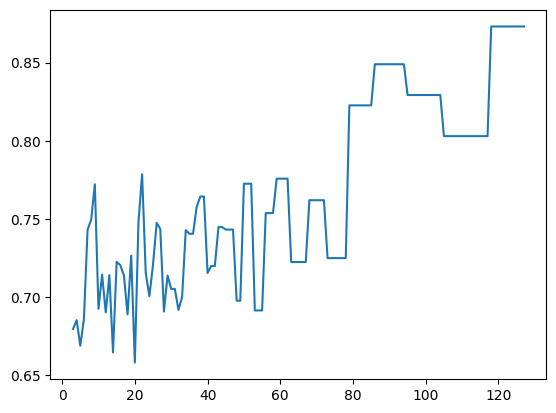

In [112]:
plt.plot(cuts.keys(), cuts.values())

In [ ]:
plt.plot(cuts2.keys(), cuts2.values())